In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from datetime import datetime, date, time, timezone
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Old model without total items volumne: df = pd.read_csv('GM_box_size_clean_data.csv')
df = pd.read_csv('GM_box_size_clean_data_2509131600.csv')

In [3]:
df.shape

(7971, 7)

In [6]:
df.drop(columns = {'order_number'}, inplace = True)

In [7]:
df.head()

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol,FedEx_box_type
0,1.0,1.0,0,0.0,50.68512,1
1,1.0,1.0,0,0.0,64.80474,1
2,0.0,7.0,0,0.0,58.02192,2
3,1.0,0.0,0,0.0,86.32980,1
4,0.0,1.0,0,0.0,11.22498,0


In [12]:
df.shape

(7970, 6)

In [8]:
df['FedEx_box_type'].value_counts()

1    4091
0    2918
2     962
Name: FedEx_box_type, dtype: int64

In [9]:
# Keep the ratio of different box sizes
x_train,x_test,y_train, y_test = train_test_split(df.iloc[:,0:5], df['FedEx_box_type'], stratify = df['FedEx_box_type'])

In [10]:
y_train.value_counts()/y_train.shape[0]*100

1    51.321512
0    36.600870
2    12.077618
Name: FedEx_box_type, dtype: float64

In [11]:
# Try Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

Random Forest train score 0.853797256607561
Random Forest test score 0.8469643753135976


In [12]:
# Try GBC
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
print('GB train score',gb.score(x_train,y_train))
print('GB test score',gb.score(x_test,y_test))

GB train score 0.8780528604884577
GB test score 0.8670346211741093


In [13]:
#Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced') 
dt.fit(x_train,y_train)
print('Decision Tree train score',dt.score(x_train,y_train))
print('Decision Tree test score',dt.score(x_test,y_test))

Decision Tree train score 0.8976246236199398
Decision Tree test score 0.8504766683391871


In [ ]:

#from sklearn.utils.class_weight import compute_class_weight

#weights = compute_class_weight('balanced', classes=list(range(6)), y=y_train)
#print(weights)

In [14]:
# Add prediction into original data (Decision Tree)
df['prediction'] = dt.predict(df.iloc[:,:5])
df.head(6)

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol,FedEx_box_type,prediction
0,1.0,1.0,0,0.0,50.68512,1,1
1,1.0,1.0,0,0.0,64.80474,1,1
2,0.0,7.0,0,0.0,58.02192,2,2
3,1.0,0.0,0,0.0,86.32980,1,1
4,0.0,1.0,0,0.0,11.22498,0,0
5,1.0,0.0,0,0.0,36.90360,0,0


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['FedEx_box_type'], df['prediction'])
#row = predicted, column = actual class

array([[2806,  111,    1],
       [ 482, 3366,  243],
       [   1,   72,  889]])

In [21]:
x_test['predict'] = dt.predict(x_test)
x_test

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol,predict
651,1.0,1.0,0,0.0,42.35478,1
6546,0.0,0.0,1,0.0,320.76000,2
5244,2.5,0.0,0,0.0,37.90050,1
773,1.0,0.0,0,0.0,12.12750,0
7570,1.0,1.0,0,0.0,83.71194,1
...,...,...,...,...,...,...
5382,0.0,1.0,0,0.0,11.22498,0
1624,0.0,1.0,0,0.0,32.28012,0
3228,0.0,1.0,0,0.0,13.12200,0
2095,0.0,1.0,0,0.0,11.22498,0


In [22]:
confusion_matrix(y_test, dt.predict(x_test.iloc[:,:-1]))

array([[701,  29,   0],
       [124, 801,  98],
       [  1,  46, 193]])

In [23]:
dt.predict(np.array([13,1,1,0,100]).reshape(1,-1))

array([1])

In [24]:
df.columns

Index(['item_size_0', 'item_size_1', 'item_size_2', 'item_size_3',
       'total_order_vol', 'FedEx_box_type', 'prediction'],
      dtype='object')

In [16]:
dt.feature_importances_

array([6.00680315e-02, 2.10417970e-01, 6.23280178e-05, 1.54170979e-02,
       7.14034573e-01])

In [ ]:
df.loc[df['item_size_3'] > 0]

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file="tree.dot", class_names=['0','1','2','3'],
feature_names=['item_size_0', 'item_size_1', 'item_size_2','item_size_3','total_vol'], impurity=False, filled=True)

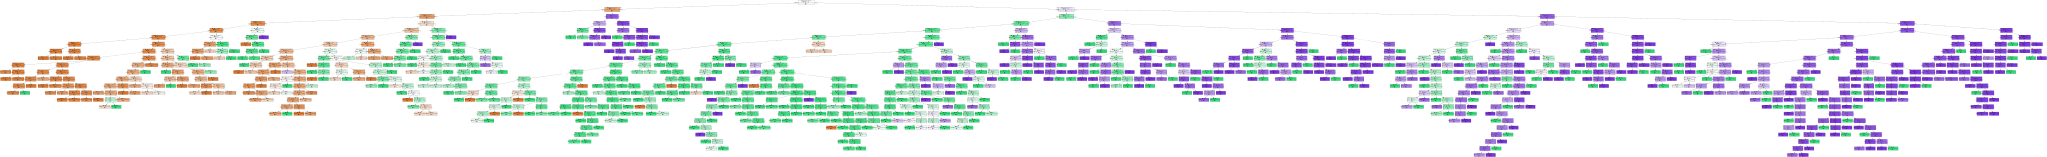

In [18]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)